In [11]:
#import tools
import pandas as pd
import numpy as np

In [12]:
# read the data set
ff_cancer_df = pd.read_csv('../../cleaned_data/us_clean/SW21 - ML_data_ff_cancer_w_avgs.csv', dtype={'GEOID': str})
ff_cancer_df.head()

,latitude,longitude,GEOID,County_x,nameplate_capacity_MW1,NOx_tons1,SO2_tons1,CO2_tons1,CH4_lbs1,N2O_lbs1,...,avg_CO2_over_d2,avg_CH4_over_d2,avg_N2O_over_d2,avg_PM2.5_over_d2,avg_NOx_norm_over_d2,avg_SO2_norm_over_d2,avg_CO2_norm_over_d2,avg_CH4_norm_over_d2,avg_N2O_norm_over_d2,avg_PM2.5_norm_over_d2
0,32.534920,-86.642749,01001,Autauga County,939.4,50.521,3.849,762545.203,28447.358,2844.736,...,9090.126982,405.357721,57.630938,0.404770,0.005512,0.008032,7.723091,1.124036,0.292679,0.000477
1,30.660970,-87.749840,01003,Baldwin County,50.0,450.864,4.580,167490.328,6318.013,631.801,...,555.172427,19.553800,1.955380,0.043945,0.005227,0.000431,3.475500,0.126674,0.012667,0.000382
2,31.869603,-85.393197,01005,Barbour County,120.5,312.818,0.590,0.000,134642.958,24655.800,...,5.282991,35.935270,6.714078,0.001799,0.001069,0.000666,0.060757,0.308435,0.057802,0.000031
3,32.998644,-87.126439,01007,Bibb County,13.0,16.113,2.219,0.011,12526.086,1644.049,...,1157.221806,111.274622,15.659547,0.051646,0.000896,0.000105,0.894578,0.282251,0.044297,0.000042
4,33.980867,-86.567371,01009,Blount County,3.8,2.197,0.009,1006.565,37.975,3.790,...,3172.217969,659.893056,95.881832,0.032135,0.000698,0.000065,1.383653,0.245878,0.035385,0.000033


In [13]:
X = ff_cancer_df.copy()
X = X.drop(['GEOID', 'County_x', 'County_y', 'cardio_death',
        'total_cancer', 'bladder', 'brain',
       'breast', 'breast_insitu', 'cervix', 'colon', 'esophagus',
       'kidney_and_renal', 'leukemia', 'liver', 'lung', 'melanoma',
       'non-hodgkins_lymphoma', 'oral_cavity', 'ovary', 'pancreas', 'prostate',
       'pediatric_asthma', 'adult_asthma', 'COPD', 'adult_chronic_lung_disease',
       'stomach', 'thyroid', 'uterus','adult_chronic_lung_disease', 'pediatric_asthma_per_100k',
       'adult_asthma_per_100k', 'COPD_per_100k',
       'adult_chronic_lung_disease_per_100k', 'cardio_death_per_100k'], axis=1)
X.head()

,latitude,longitude,nameplate_capacity_MW1,NOx_tons1,SO2_tons1,CO2_tons1,CH4_lbs1,N2O_lbs1,PM2.5_tons1,dist_from_county1,...,avg_CO2_over_d2,avg_CH4_over_d2,avg_N2O_over_d2,avg_PM2.5_over_d2,avg_NOx_norm_over_d2,avg_SO2_norm_over_d2,avg_CO2_norm_over_d2,avg_CH4_norm_over_d2,avg_N2O_norm_over_d2,avg_PM2.5_norm_over_d2
0,32.534920,-86.642749,939.4,50.521,3.849,762545.203,28447.358,2844.736,36.930022,10.0,...,9090.126982,405.357721,57.630938,0.404770,0.005512,0.008032,7.723091,1.124036,0.292679,0.000477
1,30.660970,-87.749840,50.0,450.864,4.580,167490.328,6318.013,631.801,7.857154,19.0,...,555.172427,19.553800,1.955380,0.043945,0.005227,0.000431,3.475500,0.126674,0.012667,0.000382
2,31.869603,-85.393197,120.5,312.818,0.590,0.000,134642.958,24655.800,1.386006,30.0,...,5.282991,35.935270,6.714078,0.001799,0.001069,0.000666,0.060757,0.308435,0.057802,0.000031
3,32.998644,-87.126439,13.0,16.113,2.219,0.011,12526.086,1644.049,0.000000,31.0,...,1157.221806,111.274622,15.659547,0.051646,0.000896,0.000105,0.894578,0.282251,0.044297,0.000042
4,33.980867,-86.567371,3.8,2.197,0.009,1006.565,37.975,3.790,0.154237,30.0,...,3172.217969,659.893056,95.881832,0.032135,0.000698,0.000065,1.383653,0.245878,0.035385,0.000033


<Axes: >

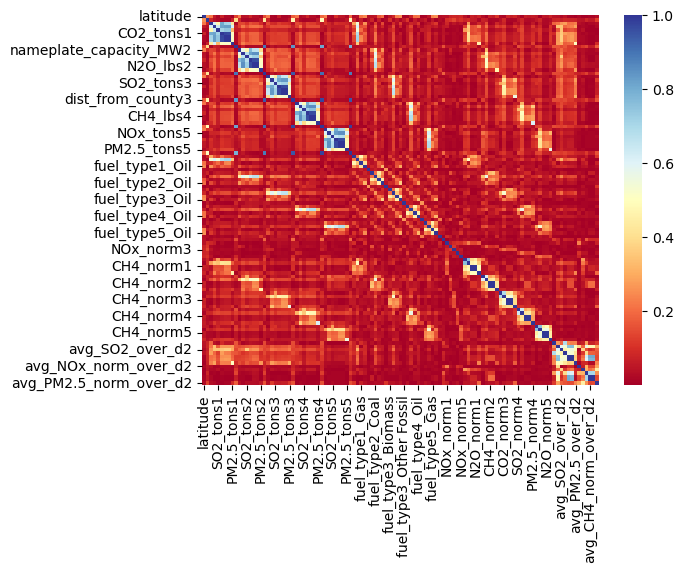

In [14]:
# visualize correlations between features
corr_df = X.corr()
%matplotlib inline
import seaborn as sns
sns.heatmap(corr_df.abs(),cmap="RdYlBu")

The Heat map indicates that there are several highly correlated features

In [15]:
#Which features are correlated?
feat_list = X.columns.to_list()
def proc_data(df,cut_off=0.95):
    # 1. drop the high correlation columns
    high_corr={}
    for i in range(len(feat_list)-1):
        high_corr[feat_list[i]] = []
        for j in range(i+1, len(feat_list)):
            if (abs(df[feat_list[i]].corr(df[feat_list[j]])) >= cut_off):
                high_corr[feat_list[i]].append(feat_list[j])
    return(high_corr)
proc_data(X)

{'latitude': [],
 'longitude': [],
 'nameplate_capacity_MW1': [],
 'NOx_tons1': [],
 'SO2_tons1': [],
 'CO2_tons1': ['CH4_lbs1', 'N2O_lbs1'],
 'CH4_lbs1': ['N2O_lbs1'],
 'N2O_lbs1': [],
 'PM2.5_tons1': [],
 'dist_from_county1': [],
 'nameplate_capacity_MW2': [],
 'NOx_tons2': [],
 'SO2_tons2': [],
 'CO2_tons2': ['CH4_lbs2', 'N2O_lbs2'],
 'CH4_lbs2': ['N2O_lbs2'],
 'N2O_lbs2': [],
 'PM2.5_tons2': [],
 'dist_from_county2': [],
 'nameplate_capacity_MW3': [],
 'NOx_tons3': [],
 'SO2_tons3': [],
 'CO2_tons3': ['CH4_lbs3', 'N2O_lbs3'],
 'CH4_lbs3': ['N2O_lbs3'],
 'N2O_lbs3': [],
 'PM2.5_tons3': [],
 'dist_from_county3': ['dist_from_county4'],
 'nameplate_capacity_MW4': [],
 'NOx_tons4': [],
 'SO2_tons4': [],
 'CO2_tons4': ['CH4_lbs4', 'N2O_lbs4'],
 'CH4_lbs4': ['N2O_lbs4'],
 'N2O_lbs4': [],
 'PM2.5_tons4': [],
 'dist_from_county4': ['dist_from_county5'],
 'nameplate_capacity_MW5': [],
 'NOx_tons5': [],
 'SO2_tons5': [],
 'CO2_tons5': ['CH4_lbs5', 'N2O_lbs5'],
 'CH4_lbs5': ['N2O_lbs5'],
 'N2O

Distances from different power plants are highly correlated. Polutants are highly correlated

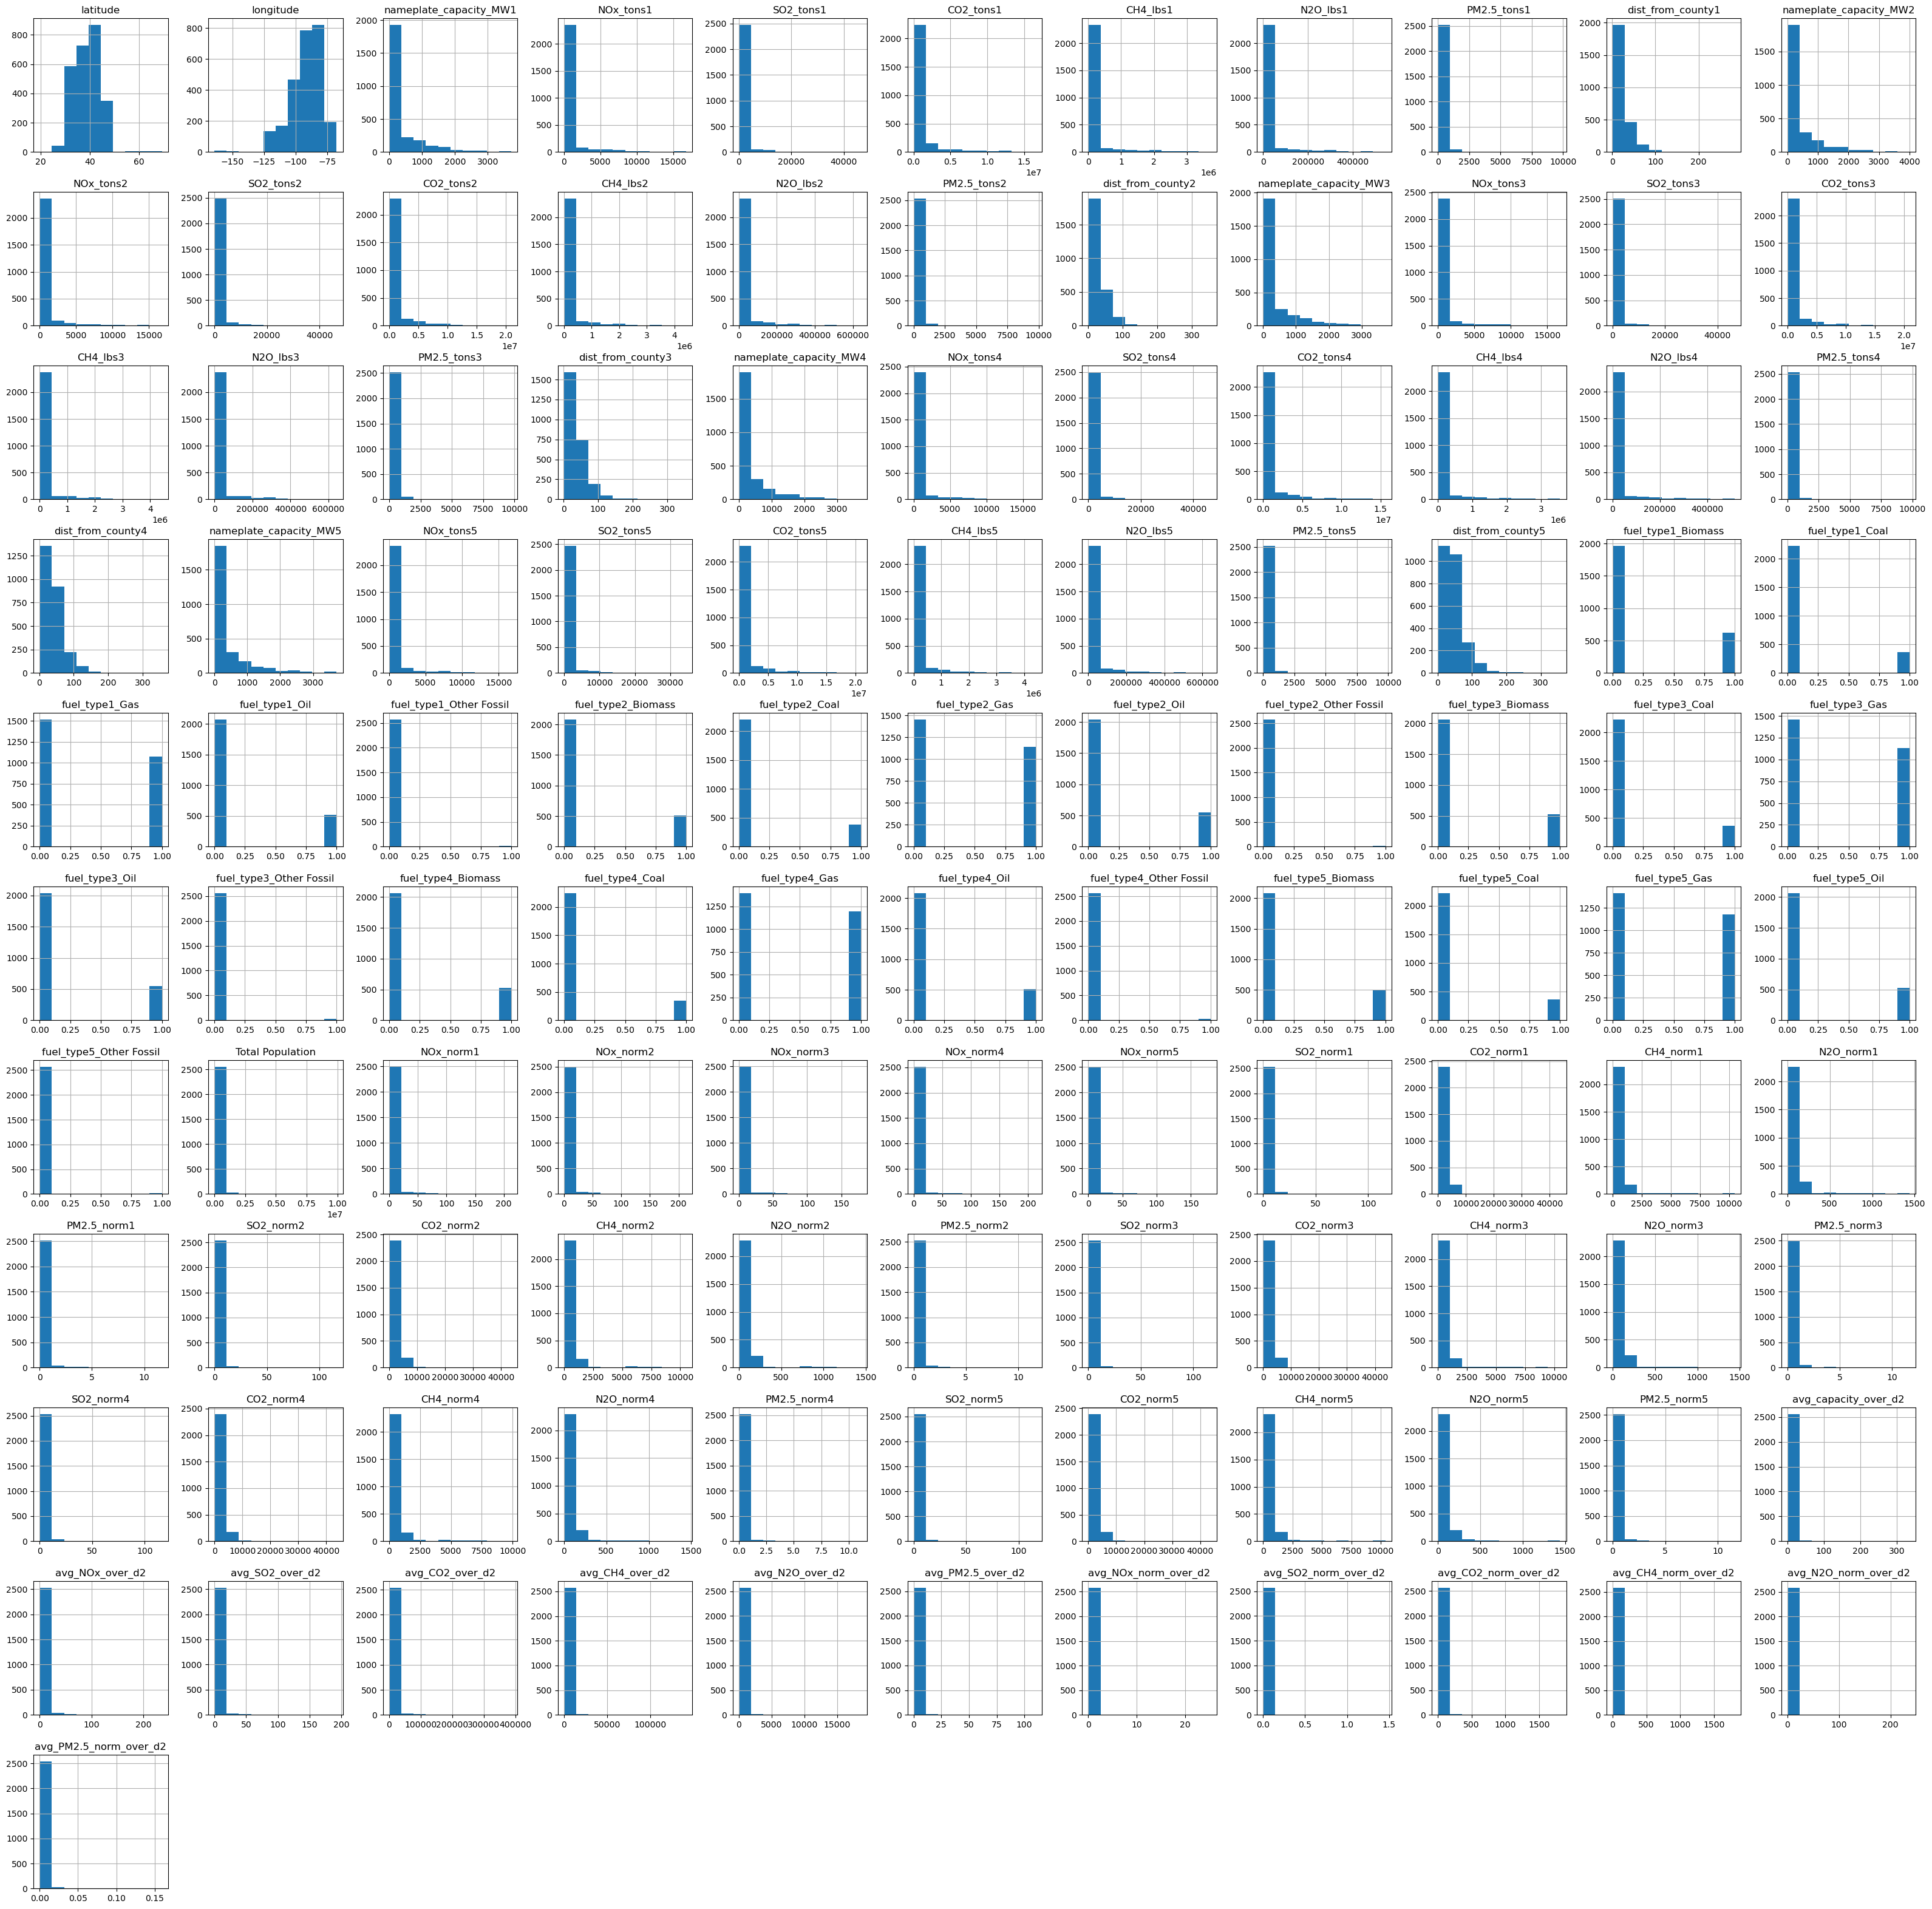

In [16]:
#look at the distribution of features
%matplotlib inline
import matplotlib.pyplot as plt

X.hist(figsize=(40,40))
plt.show()

There are several features with just one value (very low variance)

In [17]:
# Define the target set.
tar_list = ['cardio_death', 'total_cancer', 'bladder', 'brain',
       'breast', 'breast_insitu', 'cervix', 'colon', 'esophagus',
       'kidney_and_renal', 'leukemia', 'liver', 'lung', 'melanoma',
       'non-hodgkins_lymphoma', 'oral_cavity', 'ovary', 'pancreas', 'prostate',
       'stomach', 'thyroid', 'uterus', 'pediatric_asthma',
       'adult_asthma', 'COPD', 'adult_chronic_lung_disease', 'pediatric_asthma_per_100k',
       'adult_asthma_per_100k', 'COPD_per_100k',
       'adult_chronic_lung_disease_per_100k', 'Total Population','cardio_death_per_100k']
y = ff_cancer_df[tar_list]
y

,cardio_death,total_cancer,bladder,brain,breast,breast_insitu,cervix,colon,esophagus,kidney_and_renal,...,pediatric_asthma,adult_asthma,COPD,adult_chronic_lung_disease,pediatric_asthma_per_100k,adult_asthma_per_100k,COPD_per_100k,adult_chronic_lung_disease_per_100k,Total Population,cardio_death_per_100k
0,263.9,506.4,15.8,7.0,124.4,23.9,0.0,45.8,0.0,10.6,...,1718.0,3906.0,4274.0,8657.0,3059.934099,6956.986375,7612.432095,15419.004364,56145.0,470.032950
1,241.9,455.7,23.1,6.5,124.7,25.5,11.0,33.3,0.0,11.6,...,6393.0,16246.0,19461.0,36546.0,2788.208664,7085.443135,8487.615957,15938.976043,229287.0,105.500966
2,351.2,447.2,13.3,0.0,109.5,22.6,0.0,41.9,0.0,0.0,...,664.0,1760.0,2001.0,3855.0,2700.394485,7157.672130,8137.785188,15677.742080,24589.0,1428.280939
3,323.6,466.1,19.8,0.0,113.9,0.0,0.0,26.4,0.0,0.0,...,584.0,1603.0,1754.0,3433.0,2638.236357,7241.597398,7923.744127,15508.673654,22136.0,1461.872064
4,283.6,438.7,17.4,6.7,113.6,21.6,0.0,34.4,0.0,11.2,...,1742.0,4028.0,4638.0,9075.0,3009.727189,6959.346222,8013.269061,15679.261908,57879.0,489.987733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2584,204.1,427.8,23.0,8.2,86.4,14.9,0.0,25.7,0.0,15.1,...,932.0,3218.0,1824.0,5399.0,2184.050805,7541.068123,4274.365524,12652.028215,42673.0,478.288379
2585,118.9,410.8,18.7,0.0,155.2,32.7,0.0,37.9,0.0,0.0,...,357.0,1945.0,1149.0,3094.0,1519.342895,8277.652466,4889.985956,13167.638422,23497.0,506.022045
2586,221.3,353.7,20.6,0.0,112.2,0.0,0.0,43.3,0.0,0.0,...,482.0,1460.0,902.0,2565.0,2384.368044,7222.359634,4462.033144,12688.597576,20215.0,1094.731635
2587,207.3,351.0,0.0,0.0,101.7,0.0,0.0,0.0,0.0,0.0,...,147.0,591.0,433.0,1043.0,1894.329897,7615.979381,5579.896907,13440.721649,7760.0,2671.391753


In [18]:
# make test and train data sets and scale them
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
import xgboost
from sklearn.metrics import mean_squared_error, r2_score
import joblib
rf_xg={}
eval_xg = {}
#params = dict(
#    learning_rate=0.8,
#    num_parallel_tree=500,
#    subsample=0.60,
#    reg_lambda=0,
#    max_depth=20,
#    min_child_weight=2
#)
for i in y_train.columns:
    rf_xg[i] = xgboost.XGBRFRegressor()
    rf_xg[i].fit(X_train_scaled,y_train[i])
    pred = rf_xg[i].predict(X_test_scaled)
    pred_train = rf_xg[i].predict(X_train_scaled)
    eval_xg[i] = [r2_score(y_train[i],pred_train),r2_score(y_test[i], pred)]
eval_xg

{'cardio_death': [0.7033633904143346, 0.5638440078939984],
 'total_cancer': [0.8278741875375831, 0.7307234143951704],
 'bladder': [0.81414406960688, 0.5250755820876469],
 'brain': [0.890062813531093, 0.597087495650718],
 'breast': [0.8100816856559636, 0.6887244510692487],
 'breast_insitu': [0.8122461658869051, 0.6305564367318461],
 'cervix': [0.839420929700918, 0.6013479413455161],
 'colon': [0.7637295162503532, 0.4851861220468856],
 'esophagus': [0.9404751599364325, 0.5502643147463693],
 'kidney_and_renal': [0.8167492441545525, 0.5598112496481445],
 'leukemia': [0.8220632585732908, 0.5634977414118554],
 'liver': [0.9061097064718584, 0.6208358484797591],
 'lung': [0.7728361604334947, 0.6637778616427272],
 'melanoma': [0.7805776960256783, 0.5070634243767002],
 'non-hodgkins_lymphoma': [0.8463157975167469, 0.6276654377114548],
 'oral_cavity': [0.8686027370057944, 0.5802184916000337],
 'ovary': [0.8453475862055881, 0.6638146790049853],
 'pancreas': [0.8719792175718744, 0.5741293268764056]

In [42]:
#R2 for train and test from RF with n_estimators=1024 
orig_eval_RT={'cardio_death': [0.9418551129951124, 0.6134171941662971],
 'total_cancer': [0.9551678430549312, 0.7553605860242674],
 'bladder': [0.9487132925963299, 0.531349877830886],
 'brain': [0.9551241974810936, 0.5970920802812341],
 'breast': [0.9430715251270325, 0.6812180296059729],
 'breast_insitu': [0.9488522408246479, 0.628873598175693],
 'cervix': [0.9366997611286323, 0.6126368003748974],
 'colon': [0.9329973047353874, 0.49155450637534626],
 'esophagus': [0.9415493810221938, 0.5279765710934372],
 'kidney_and_renal': [0.9461964736468513, 0.5663196145323439],
 'leukemia': [0.9432225243131915, 0.5755250178969299],
 'liver': [0.9482816558533781, 0.6268307724151161],
 'lung': [0.9470348425159906, 0.6773752218851954],
 'melanoma': [0.9389408006681784, 0.5152191102797314],
 'non-hodgkins_lymphoma': [0.9485196699147787, 0.619829429063679],
 'oral_cavity': [0.9479232952477059, 0.5593850516943794],
 'ovary': [0.9486095123626576, 0.6549364097981649],
 'pancreas': [0.9533812503100952, 0.5785508499445644],
 'prostate': [0.9323877701142671, 0.5868496769568643],
 'stomach': [0.9534843388548324, 0.6145883180172758],
 'thyroid': [0.9547116778078985, 0.5484641164746219],
 'uterus': [0.950391802731808, 0.6636867780516436],
 'pediatric_asthma': [0.9802109912623359, 0.9765715098205319],
 'adult_asthma': [0.9643970909883379, 0.9552704099663143],
 'COPD': [0.9696432535715299, 0.9354460376855976],
 'adult_chronic_lung_disease': [0.969413977057763, 0.96741062851525],
 'pediatric_asthma_per_100k': [0.8906452323932428, 0.22938881485583495],
 'adult_asthma_per_100k': [0.8795990959971809, 0.4728032712190199],
 'COPD_per_100k': [0.9473733375433125, 0.7602544087520632],
 'adult_chronic_lung_disease_per_100k': [0.8853435482881554,
  0.4240926818640268],
 'Total Population': [0.9766715667548073, 0.9679208107436155],
 'cardio_death_per_100k': [0.9654478079542356, 0.8373589989328712]}


In [53]:
import numpy as np
diff = {}
for i in orig_eval_RT.keys():
    diff[i] = (np.array(orig_eval_RT[i]) - np.array(eval_xg[i]))*100/np.array(orig_eval_RT[i]) 

In [54]:
diff

{'cardio_death': array([25.32148727,  8.08147974]),
 'total_cancer': array([13.32683637,  3.26164379]),
 'bladder': array([14.18439312,  1.1808219 ]),
 'brain': array([6.81182449e+00, 7.67826382e-04]),
 'breast': array([14.10177658, -1.10191174]),
 'breast_insitu': array([14.3969808 , -0.26759568]),
 'cervix': array([10.38527343,  1.84266747]),
 'colon': array([18.14236629,  1.29556016]),
 'esophagus': array([ 0.11409079, -4.22135088]),
 'kidney_and_renal': array([13.68079813,  1.14923883]),
 'leukemia': array([12.84524729,  2.08979212]),
 'liver': array([4.44719658, 0.95638635]),
 'lung': array([18.39411543,  2.00736015]),
 'melanoma': array([16.86614369,  1.58295485]),
 'non-hodgkins_lymphoma': array([10.77509256, -1.26422017]),
 'oral_cavity': array([ 8.36782455, -3.72434691]),
 'ovary': array([10.88560939, -1.35559255]),
 'pancreas': array([8.53824561, 0.76424105]),
 'prostate': array([21.27834737,  3.55706452]),
 'stomach': array([ 7.68137945, -1.75910726]),
 'thyroid': array([ 6.